# The Classification Predict

© Explore Data Science Academy

---
### Honour Code

I {**DIANE, GOVINDAN**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: EDSA - Twitter Sentiment Classification

**Description**

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

**Evaluation**

The evaluation metric
Mean F1-Score. The F1 score, commonly used in information retrieval, measures performance using the statistics precision and recall.

Precision is the ratio of true positives to all predicted positives. Recall is the ratio of true positives to all actual positives.
The F1 metric weights recall and precision equally, and a good retrieval algorithm will maximize both precision and recall simultaneously. Thus, moderately good performance on both will be favored over extremely good performance on one and poor performance on the other.

Submission Format
For every tweet in the dataset, submission files should contain two columns: tweetid and sentiment. sentiment should be a space-delimited list. Every tweetid will have a sentiment, as per your prediction. Refer to the Description page for more information about the valid classes in the sentiment column.

The file should contain a header and have the following format:

tweetid,sentiment
35326,1
15327,-1
54232,0

**Data**

Label   Sentiments    Description
     2       News:         the tweet link to factual news about climate change
     1       Pro:          the tweet supports the belief of man-made climate change
     0       Neutral:      the tweet neither supports nor refutes the belief of man-made climate change
    -1       Anti:         the tweet does not believe in man-made climate change

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [3]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import scipy
#import sklearn.externals as extjoblib
#import joblib
#from profanity_check import predict
#from better_profanity import profanity
from statsmodels.graphics.correlation import plot_corr
from scipy.stats import pearsonr
from sklearn.utils import resample

# Libraries for data preparation and model building
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import xgboost as xgb
from numpy import loadtxt
from xgboost import XGBClassifier
#import catboost as ctb
#from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm as ltb

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [4]:
# load the data
df_train = pd.read_csv('https://raw.githubusercontent.com/dianegovindan/dianegovindan/main/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/dianegovindan/dianegovindan/main/test_with_no_labels.csv')
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [5]:
# look at data statistics
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [6]:
# Findings

# There are no null values in the data set for cleaning/imputations.
# However, tweetid does not seem to provide any useful information to the 
# analysis and should be considered to be dropped from the data

 1    0.539225
 2    0.230103
 0    0.148745
-1    0.081927
Name: sentiment, dtype: float64


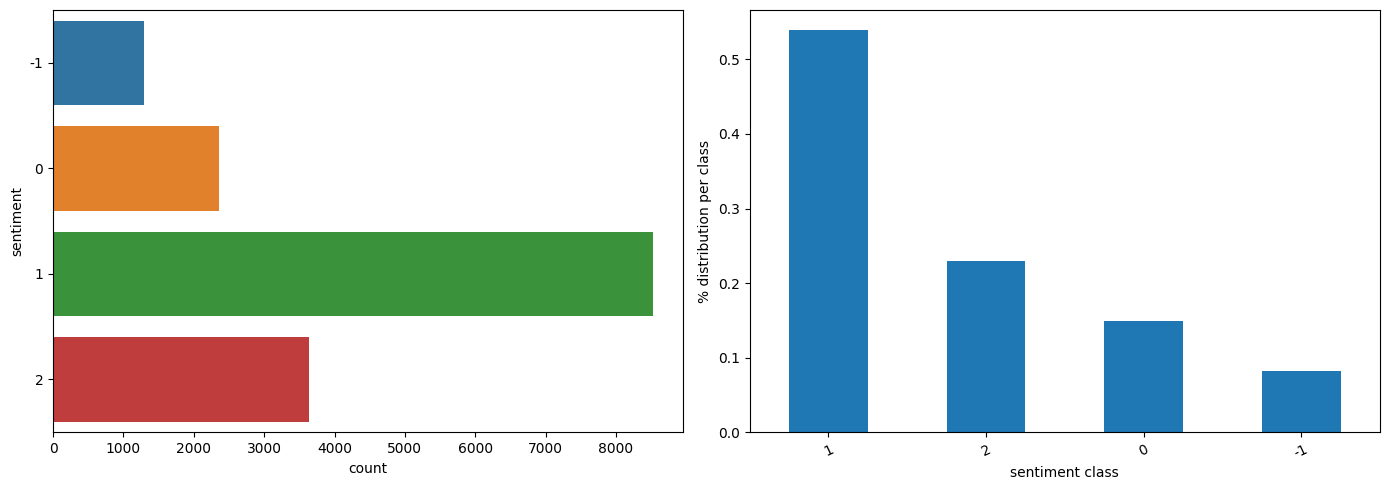

In [7]:
# Plotting frequency and proportions of sentiment classes (response variable) for train data

stats_sentiment = df_train['sentiment'].value_counts(normalize=True)
print(stats_sentiment)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data=df_train,y='sentiment')
plt.subplot(1,2,2)
stats_sentiment.plot.bar(rot=25)
plt.ylabel('% distribution per class')
plt.xlabel('sentiment class')
plt.tight_layout()
plt.show()

In [8]:
# Findings

# Around 54% of the data tweets belong to class 1 (Pro climate change), while the remaining class proportions are significantly
# smaller in comparison.This could lead to the model being biased where it is able to predict class 1 better than 
# the other classes, and can incorrectly lead the audience to believe that the general tweet sentiment is pro climate change.
# A possible consideration to balance the class imbalance of data, and reduce model bias is to try resampling 
# the data (up/down/combination of both)


In [9]:
# reweight
cw = {-1: 0.46, 0:1.09, 1:1.67, 2:3.13}

In [10]:
df_train = df_train.drop(['tweetid'], axis = 1)

In [11]:
# General analysis of tweets
row = 188
df_train['message'][row],df_train['sentiment'][row] 

('RT @LiterateLiberal: Leading global warming deniers just told us what they want trump to do https://t.co/tkZVNzDDd3 via @MotherJones',
 2)

In [12]:
# Findings

# There may be some correlations between the below and the relevant sentiment class:
# Number of hastags in a tweet
# If tweet is a RT
# Number of @'s in a tweet
# Presence and number of https links in a tweet
# If there are ?, ! or ''/"" >>> signal emotions
# Tweet length (limit is 280 characters)
# Profanity within the tweet >>> signal emotions


In [13]:
# Balanced sampling below did not produce better results

In [14]:
## Resampling 
## Separate minority and majority classes

#anti = df_train[df_train['sentiment']==-1]
#neutral = df_train[df_train['sentiment']==0]
#pro = df_train[df_train['sentiment']==1]
#news = df_train[df_train['sentiment']==2]


In [15]:
# Downsample majority

#min_class = news

#pro_downsampled = resample(pro,
#                          replace=False, # sample without replacement (no need to duplicate observations)
#                          n_samples=len(min_class), # match number in selected minority class
#                          random_state=42) # reproducible results

# Combine downsampled majority class with minority class
#df_downsampled = pd.concat([pro_downsampled, neutral, anti, news])

# Check new class counts
#df_downsampled['sentiment'].value_counts()

#df_train = df_downsampled

In [16]:
##function to upsample

#def upsampling(class_name, max_class_name):
#    upsampled = resample(class_name,
#                         replace=True, # sample without replacement (no need to duplicate observations)
#                         n_samples=len(max_class_name), # match number in selected minority class
#                         random_state=42) # reproducible results
#    return upsampled

In [17]:
## Upsample minority

#max_class = news

#neutral_upsampled = upsampling(neutral,max_class)

#anti_upsampled = upsampling(anti,max_class)

#news_upsampled = upsampling(news,max_class)


# Combine downsampled majority class with minority class
#df_upsampled = pd.concat([pro, neutral_upsampled, anti_upsampled, news_upsampled])
#df_upsampled = pd.concat([pro_downsampled, neutral_upsampled, anti_upsampled, news])

# Check new class counts
#df_upsampled['sentiment'].value_counts()

#df_train = df_upsampled

In [18]:
# Check new class counts
#df_upsampled['sentiment'].value_counts()

In [19]:
# Add Tweet length feature

# Converting of http link to http word only to remove bias due to length of link
# Some preprocessing is required as only the actual tweet length is to be summed. Counting chars only from : onwards for RT

def clean_http(text):
    text = re.sub(r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+', r'http', text) #remove the url and replace with http
    return text

def tweet_length(text):
    count = 0
    
    # search if RT then search the :, count from that
    if text[0:2]=='RT':
        pos = text.find(':')
        count = len(text[pos:])
    else: # if not RT, count length
        count = len(text)    
    
    return count


In [20]:
# run functions and apply to message column
df_train['message'] = df_train['message'].apply(clean_http)
df_train['tweet_length'] = df_train['message'].apply(tweet_length)
df_train.head()

,sentiment,message,tweet_length
0,1,PolySciMajor EPA chief doesn't think carbon di...,121
1,1,It's not like we lack evidence of anthropogeni...,62
2,2,RT @RawStory: Researchers say we have three ye...,94
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,80
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",103


In [21]:
# Descriptive statistics for tweet length per sentiment class
df_train.groupby('sentiment')['tweet_length'].describe().T

sentiment,-1,0,1,2
count,1296.000000,2353.000000,8530.000000,3640.000000
mean,108.044753,97.289843,110.212309,91.246703
std,24.644803,30.905484,21.609617,19.667534
min,1.000000,1.000000,1.000000,1.000000
25%,95.000000,72.000000,100.000000,77.000000
50%,118.000000,105.000000,117.000000,91.000000
75%,124.000000,122.000000,124.000000,106.000000
max,160.000000,155.000000,195.000000,145.000000


In [22]:
# Add Hastag count feature

def hashtag_count(text):
    count = 0
    count = text.count('#')
    return count

In [23]:
df_train['hashtag_count'] = df_train['message'].apply(hashtag_count)
df_train.head()

,sentiment,message,tweet_length,hashtag_count
0,1,PolySciMajor EPA chief doesn't think carbon di...,121,0
1,1,It's not like we lack evidence of anthropogeni...,62,0
2,2,RT @RawStory: Researchers say we have three ye...,94,0
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,80,2
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",103,1


In [24]:
# Get stats for hashtag count per sentiment class
stats_hashtag = df_train.groupby('sentiment')['hashtag_count'].sum()
total_per_class = df_train.groupby('sentiment')['sentiment'].count()
hashtag_perc = stats_hashtag/total_per_class
print(hashtag_perc)

sentiment
-1    0.187500
 0    0.176371
 1    0.308675
 2    0.241209
dtype: float64


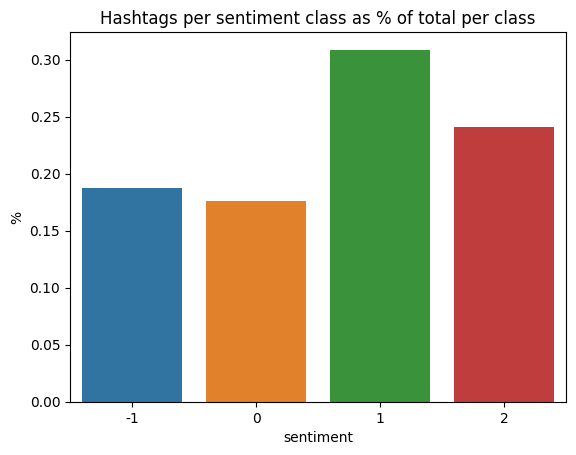

In [25]:
# Plot hashtag count %
sns.barplot(y=hashtag_perc, x=[-1,0,1,2])
plt.xlabel("sentiment")
plt.ylabel("%")
plt.title("Hashtags per sentiment class as % of total per class")
plt.show()

In [26]:
# Findings

# There seems to be a large proportion of tweets with hashtags that is applicable to Pro climate change class (31%)
# This could be showing some predictabilty with this feature

In [27]:
# Add RT count feature

def RT_count(text):
    if text[0:2]=='RT':
        count = 1
    else:
        count = 0
    return count

In [28]:
df_train['RT_count'] = df_train['message'].apply(RT_count)
df_train.head()
#df_train['RT_indicator'].drop

,sentiment,message,tweet_length,hashtag_count,RT_count
0,1,PolySciMajor EPA chief doesn't think carbon di...,121,0,0
1,1,It's not like we lack evidence of anthropogeni...,62,0,0
2,2,RT @RawStory: Researchers say we have three ye...,94,0,1
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,80,2,0
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",103,1,1


In [29]:
# Get stats for RT count per sentiment class
stats_RT = df_train.groupby('sentiment')['RT_count'].sum()
total_per_class = df_train.groupby('sentiment')['sentiment'].count()
RT_perc = stats_RT/total_per_class
print(RT_perc)

sentiment
-1    0.526235
 0    0.458564
 1    0.674209
 2    0.584615
dtype: float64


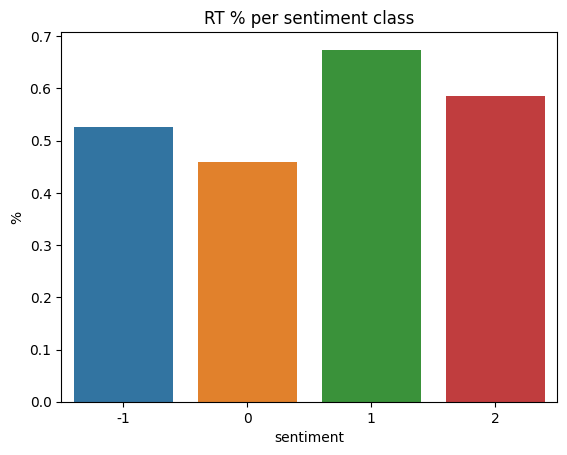

In [30]:
# Plot RT count %
sns.barplot(y=RT_perc, x=[-1,0,1,2])
plt.xlabel("sentiment")
plt.ylabel("%")
plt.title("RT % per sentiment class")
plt.show()

In [31]:
# Findings

# There seems to be a large proportion of Retweets applicable to Pro climate change (67%)
# This could be showing some predictabilty with this feature

In [32]:
# Add punctuation (?!'") count feature

def punc_count(text):
    count_qm = 0
    count_em = 0
    count_sq = 0
    count_dq = 0
    
    count_qm = text.count('?')
    count_em = text.count('!')
    count_sq = text.count('\'')
    if count_sq % 2 != 0:
           count_sq = count_sq - 1
    count_dq = text.count('"')
    sum_count = count_qm + count_em + count_sq + count_dq     
    
    return sum_count

In [33]:
df_train['punc_count'] = df_train['message'].apply(punc_count)
df_train.head()

,sentiment,message,tweet_length,hashtag_count,RT_count,punc_count
0,1,PolySciMajor EPA chief doesn't think carbon di...,121,0,0,2
1,1,It's not like we lack evidence of anthropogeni...,62,0,0,0
2,2,RT @RawStory: Researchers say we have three ye...,94,0,1,0
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,80,2,0,0
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",103,1,1,0


In [34]:
# Get stats for punc count per sentiment class
stats_punc = df_train.groupby('sentiment')['punc_count'].sum()
total_per_class = df_train.groupby('sentiment')['sentiment'].count()
punc_perc = stats_punc/total_per_class
print(punc_perc)

sentiment
-1    0.851080
 0    0.693158
 1    0.569050
 2    0.328297
dtype: float64


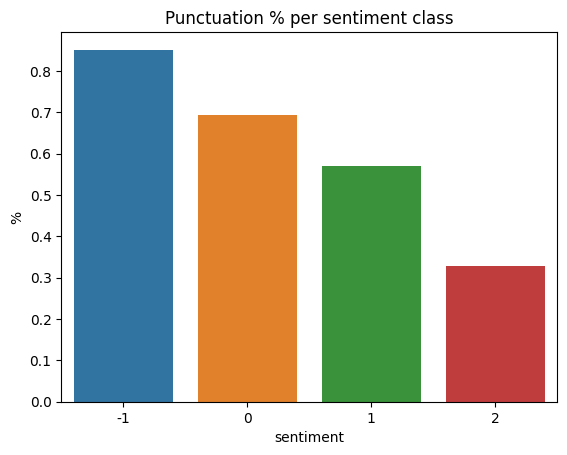

In [35]:
# Plot punc_count %
sns.barplot(y=punc_perc, x=[-1,0,1,2])
plt.xlabel("sentiment")
plt.ylabel("%")
plt.title("Punctuation % per sentiment class")
plt.show()

In [36]:
# Findings

# There seems to be a large proportion of Retweets applicable to Anti climate change (85%),
# with decreasing proportions across the other classes.
# This could be showing some predictabilty with this feature

In [37]:
# add word count feature

def word_count(text):

    # search if RT then search the :, count from that
    if text[0:2]=='RT':
        pos = text.find(':')
        text = text[pos:]
    
    text_list = text.split()
    
    return len(text_list)

In [38]:
df_train['tweet_word_count'] = df_train['message'].apply(word_count)
df_train.head()

,sentiment,message,tweet_length,hashtag_count,RT_count,punc_count,tweet_word_count
0,1,PolySciMajor EPA chief doesn't think carbon di...,121,0,0,2,19
1,1,It's not like we lack evidence of anthropogeni...,62,0,0,0,10
2,2,RT @RawStory: Researchers say we have three ye...,94,0,1,0,18
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,80,2,0,0,15
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",103,1,1,0,17


In [39]:
# Descriptive statistics for tweet word count per sentiment class
df_train.groupby('sentiment')['tweet_word_count'].describe().T

sentiment,-1,0,1,2
count,1296.000000,2353.000000,8530.000000,3640.000000
mean,17.831019,16.078623,18.184877,14.776099
std,4.450499,5.502413,3.926267,3.262894
min,1.000000,1.000000,1.000000,1.000000
25%,15.000000,12.000000,16.000000,12.000000
50%,19.000000,17.000000,19.000000,15.000000
75%,21.000000,20.000000,21.000000,17.000000
max,29.000000,31.000000,31.000000,25.000000


In [40]:
# Findings 

# The mean word count does have slight difference between the different sentiment classes
# Mean difference significance test might be required or correlation check


In [41]:
# Add @ count feature

def at_count(text):
    count = 0
    count = text.count('@')
    return count

In [42]:
df_train['mentions_count'] = df_train['message'].apply(at_count)
df_train.head()

,sentiment,message,tweet_length,hashtag_count,RT_count,punc_count,tweet_word_count,mentions_count
0,1,PolySciMajor EPA chief doesn't think carbon di...,121,0,0,2,19,1
1,1,It's not like we lack evidence of anthropogeni...,62,0,0,0,10,0
2,2,RT @RawStory: Researchers say we have three ye...,94,0,1,0,18,1
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,80,2,0,0,15,0
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",103,1,1,0,17,1


In [43]:
# Get stats for @ count per sentiment class
stats_mention = df_train.groupby('sentiment')['mentions_count'].sum()
total_per_class = df_train.groupby('sentiment')['sentiment'].count()
mentions_perc = stats_mention/total_per_class
print(mentions_perc)

sentiment
-1    1.071759
 0    0.937527
 1    0.998828
 2    0.747253
dtype: float64


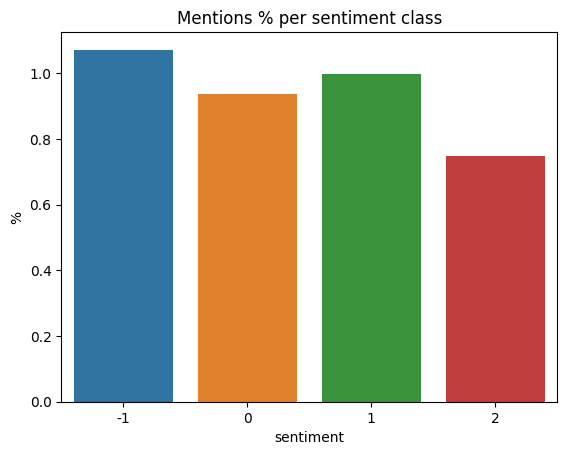

In [44]:
# Plot at_count %
sns.barplot(y=mentions_perc, x=[-1,0,1,2])
plt.xlabel("sentiment")
plt.ylabel("%")
plt.title("Mentions % per sentiment class")
plt.show()

In [45]:
# Findings

# More mentions for class (-1, 1) Anti and Pro climate change. Least is News
# > 1 shows that there are more than 1 mention in some tweets 

In [46]:
# Descriptive statistics for tweet word count per sentiment class
df_train.groupby('sentiment')['mentions_count'].describe().T

sentiment,-1,0,1,2
count,1296.000000,2353.000000,8530.000000,3640.000000
mean,1.071759,0.937527,0.998828,0.747253
std,0.839344,0.875259,0.726206,0.674074
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000
max,6.000000,7.000000,7.000000,6.000000


In [47]:
# plot relevant feature interactions

# tweet length histogram
#df_train.groupby('sentiment')['tweet_length'].hist(by=df_train['sentiment'], color = 'purple')
#plt.ylabel('count')
#plt.xlabel('tweet length')

In [48]:
# tweet word count histogram
#df_train.groupby('sentiment')['tweet_word_count'].hist(by=df_train['sentiment'], color = 'green')
#plt.ylabel('count')
#plt.xlabel('tweet length')

In [49]:
# Message Preprocessing

def clean_text_two(text):
    #text = str(text)
    text = re.sub('[\d-]', '', text) #remove any numbers
    text = re.sub(r'RT', '', text) #remove the retweets
    return text

In [50]:
# apply text cleaning two
df_train['message'] = df_train['message'].apply(clean_text_two)
df_train.head()

,sentiment,message,tweet_length,hashtag_count,RT_count,punc_count,tweet_word_count,mentions_count
0,1,PolySciMajor EPA chief doesn't think carbon di...,121,0,0,2,19,1
1,1,It's not like we lack evidence of anthropogeni...,62,0,0,0,10,0
2,2,@RawStory: Researchers say we have three year...,94,0,1,0,18,1
3,1,#TodayinMaker# WIRED : was a pivotal year in ...,80,2,0,0,15,0
4,1,"@SoyNovioDeTodas: It's , and a racist, sexist...",103,1,1,0,17,1


In [51]:
# Tokenize, Lemmatize, Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
tokenizer = nltk.RegexpTokenizer(r"\w+")
lemmatizer = WordNetLemmatizer()
stopwords = stopwords.words('english')

def message_to_token(s):
    tokens = tokenizer.tokenize(s)
    lower_cased_tokens = [t.lower() for t in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lower_cased_tokens]
    useful_tokens = [t for t in lemmatized_tokens if t not in stopwords]
    return useful_tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [52]:
df_train['message'] = df_train['message'].apply(message_to_token)
df_train['message']= df_train['message'].apply(lambda x: " ".join(x))
df_train.head()

,sentiment,message,tweet_length,hashtag_count,RT_count,punc_count,tweet_word_count,mentions_count
0,1,polyscimajor epa chief think carbon dioxide ma...,121,0,0,2,19,1
1,1,like lack evidence anthropogenic global warming,62,0,0,0,10,0
2,2,rawstory researcher say three year act climate...,94,0,1,0,18,1
3,1,todayinmaker wired wa pivotal year war climate...,80,2,0,0,15,0
4,1,soynoviodetodas racist sexist climate change d...,103,1,1,0,17,1


In [53]:
df_train.dtypes

sentiment            int64
message             object
tweet_length         int64
hashtag_count        int64
RT_count             int64
punc_count           int64
tweet_word_count     int64
mentions_count       int64
dtype: object

In [54]:
# Check for outliers: Values>3 indicate large outliers 

df_num = df_train.drop(['message'], axis = 1)
df_num.kurtosis() 

sentiment            0.122976
tweet_length         0.166845
hashtag_count       18.935808
RT_count            -1.799091
punc_count          67.595762
tweet_word_count    -0.072091
mentions_count       5.621192
dtype: float64

Text(0.5, 1.0, 'Boxplot: Hashtag Count')

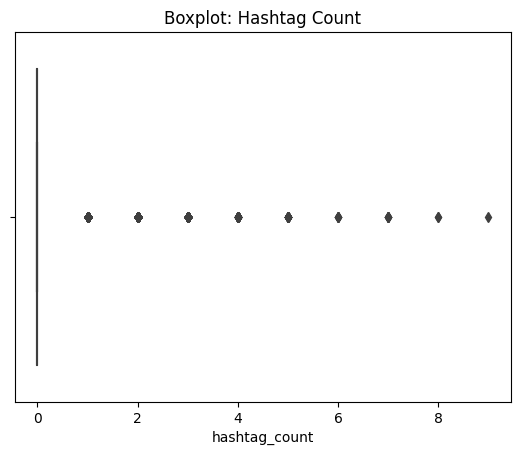

In [55]:
# Check boxplots for outlier values

sns.boxplot(x='hashtag_count', data=df_train)
plt.title('Boxplot: Hashtag Count')


Text(0.5, 1.0, 'Boxplot: Punctuation Count')

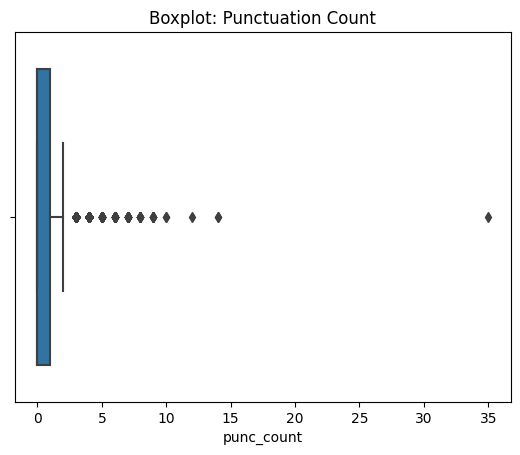

In [56]:
sns.boxplot(x='punc_count', data=df_train)
plt.title('Boxplot: Punctuation Count')

Text(0.5, 1.0, 'Boxplot: Mentions Count')

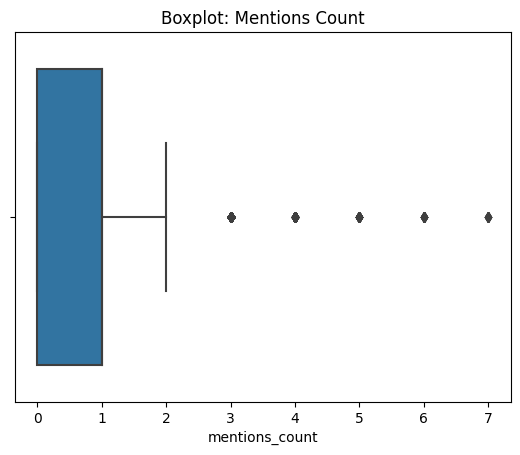

In [57]:
sns.boxplot(x='mentions_count', data=df_train)
plt.title('Boxplot: Mentions Count')

In [58]:
# feature interactions
#sns.pairplot(df_train[['sentiment','tweet_length','hashtag_count','RT_count','punc_count','tweet_word_count','mentions_count']],diag_kind='kde')

In [59]:
# Findings

# Tweet length and Tweet word count is correlated which would be expected as one is a function of the other
# Can consider dropping one of the variables 
# No material outliers found

In [60]:
# evaluate correlation

df_num = df_train.drop(['message'], axis = 1)
df_num.corr()

,sentiment,tweet_length,hashtag_count,RT_count,punc_count,tweet_word_count,mentions_count
sentiment,1.000000,-0.128002,0.036509,0.074389,-0.129680,-0.138936,-0.103909
tweet_length,-0.128002,1.000000,0.079693,0.128583,0.128397,0.880954,0.209489
hashtag_count,0.036509,0.079693,1.000000,-0.018445,-0.060955,-0.059771,-0.017948
RT_count,0.074389,0.128583,-0.018445,1.000000,0.002632,0.193688,0.454681
punc_count,-0.129680,0.128397,-0.060955,0.002632,1.000000,0.119963,0.014608
tweet_word_count,-0.138936,0.880954,-0.059771,0.193688,0.119963,1.000000,0.102549
mentions_count,-0.103909,0.209489,-0.017948,0.454681,0.014608,0.102549,1.000000


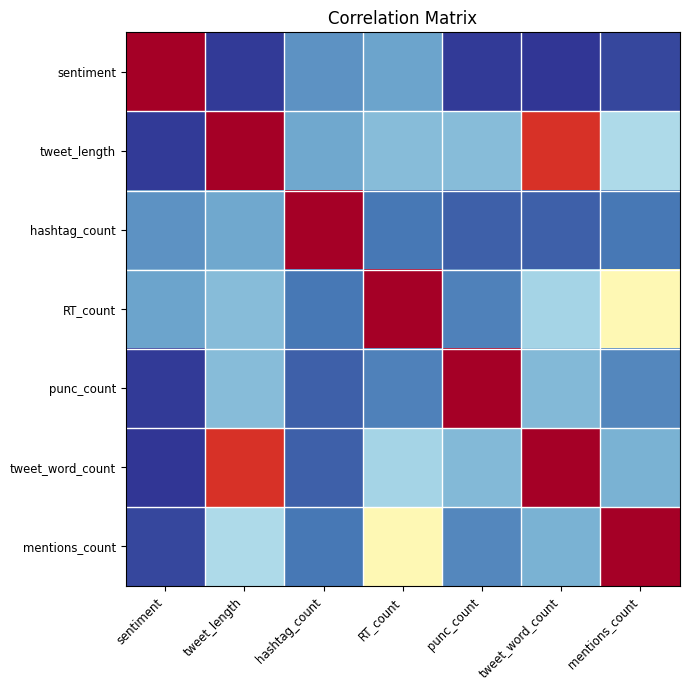

In [61]:
# Correlation Heatmap

fig = plt.figure(figsize=(7,7));
ax = fig.add_subplot(111);
plot_corr(df_num.corr(), xnames = df_num.corr().columns, ax = ax);

In [62]:
# tweet_length, punc_count, tweet_word_count, mentions_count looks correlated with sentiment


In [63]:
df_train.shape

(15819, 8)

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [64]:
# remove missing values/ features
# removing the tweetid as this column does not add any informational value to the EDA or feature selection process

#df_train = df_train.drop(['tweetid'], axis = 1)

In [65]:
# See above for new features. 
# Once the new features where included in the modelling it did not provide better results and were removed.

In [66]:
# Transform Test Data

df_test['message'] = df_test['message'].apply(clean_http)
df_test['message'] = df_test['message'].apply(clean_text_two)
df_test['message'] = df_test['message'].apply(message_to_token)
df_test['message'] = df_test['message'].apply(lambda x: " ".join(x))
df_test.head()

,message,tweetid
0,europe looking china make sure alone fighting ...,169760
1,combine polling staffer climate change woman r...,35326
2,scary unimpeachable evidence climate change al...,224985
3,karoli morgfair osborneink dailykos putin got ...,476263
4,fakewillmoore female orgasm cause global warmi...,872928


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [126]:
# Vectorizer Function

def vectorize_data(data, test):
    vectorizer = CountVectorizer(ngram_range = (1,2)) 
    #vectorizer = CountVectorizer() 
    #vectorizer = TfidfVectorizer(ngram_range = (1,2))
    vector_data = vectorizer.fit_transform(data)
    test_data = vectorizer.transform(test)
    return vector_data, vectorizer, test_data

In [125]:
# Tuning/Vectorize options
# vectorizer = TfidfVectorizer(min_df = 0.0001, max_features = 600)
# vectorizer = CountVectorizer()
# vectorizer = TfidfVectorizer()

In [127]:
# Vectorize train data and get feature names
train_data, vectorizer, test_arr = vectorize_data(df_train['message'], df_test['message'])
feature_names = vectorizer.get_feature_names_out()  
feature_names
#for name in feature_names:
#    print(name)

array(['______', '__branman', '__branman global', ...,
       '米国政府はある研究者に連絡して 申請書のアブストラクトに', 'ｎｈｋラジオ英会話', 'ｎｈｋラジオ英会話 より'],
      dtype=object)

In [128]:
# Split into X and y matix
y = df_train[['sentiment']]
X = train_data

#X.todense()
#X2 = X.toarray()
#X2.shape
X.shape

(15819, 105163)

In [71]:
# Additional features dataframe  15819 x 6

#df_af = np.array(df_train.iloc[:, 2:8])
#df_af.shape

#df_af = np.array(df_train.iloc[:, 2:])
#df_af.shape


In [72]:
# Add engineered features to Vectorized matrix

#def create_X_array(X_vect, df_arr):
    
    #get column names for train data added features
    #X_vect.todense()
    #df_train
   # df_train_col_names = df_train.columns[2:]

   # for col in df_train_col_names:
    #    col_arr = df_train[col].values          #convert column to array
    #df_arr = np.array(df_train.iloc[:, 2:])
#    new_X = np.append(X_vect, df_arr, axis=1)   #append columnn array to vectorized X matrix
        
#   return new_X

In [73]:
# Call function to combine data
#X = create_X_array(X2, df_af)
#X.shape

In [129]:
#splitting into Train and Validation sets
# X = train_data & df_train without sentiment and message cols

def split_data(X_data, y_data):
    
    X_train_s, X_valid_s, y_train_s, y_valid_s = train_test_split(X_data, y_data, test_size=0.1, random_state=42) # X was train data
    
    return X_train_s, X_valid_s, y_train_s, y_valid_s

In [75]:
# Get f1-score

def f1_score_calc(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report)
    f1_score_out = df_report.iloc[2:3,4:5]
    return f1_score_out

In [76]:
# Model fitting

def fit_model(X_train_fit, y_train_fit, X_valid_fit, model_init):
    model_init.fit(X_train_fit, y_train_fit)
    #time_to_run = %timeit -q -o model_init.fit(X_train_fit, y_train_fit)
    predictions = model_init.predict(X_valid_fit)
    predictions_train = model_init.predict(X_train_fit)
    return predictions, predictions_train #, time_to_run.best


In [77]:
# Model 1: Random Forest Classifier

RF_model = RandomForestClassifier(max_depth = 40, random_state=42)
X_train, X_valid, y_train, y_valid = split_data(X,y)
y_model_predicts, y_model_predicts_train  = fit_model(X_train, y_train, X_valid, RF_model)
print('Model 1: Random Forest Classifier')
RF_f1_train = f1_score_calc(y_train, y_model_predicts_train)
RF_f1 = f1_score_calc(y_valid, y_model_predicts)
RF_f1

Model 1: Random Forest Classifier


,accuracy
f1-score,0.60493


In [78]:
report = classification_report(y_valid, y_model_predicts)
print(report)  

              precision    recall  f1-score   support

          -1       1.00      0.07      0.13       278
           0       1.00      0.04      0.07       425
           1       0.59      0.99      0.74      1755
           2       0.91      0.19      0.31       706

    accuracy                           0.60      3164
   macro avg       0.87      0.32      0.31      3164
weighted avg       0.75      0.60      0.50      3164



In [79]:
# data from -1, 2 and 0 are going into 1, due to crossover of features from 1 - confused
# try upsampling -1, 0 and downsampling 1

In [80]:
# Results from tuning
# 10%,100 = 66   max depth 40
# 1%,200 = 68    max depth 40
# 0.0005, 400    max depth 40 = 68.7421
# 0.0005, 500    max depth 40 = 68.99
# 0.0001, 500    max depth 40 = 69.21
# 0.0001, 600    max depth 40 = 69.6587
# 0.0001, 600    max depth 40 and added features 70.41  ---------------------------------
# add feat1 (same as above hp) = 70.25
# add feat 2 = 69.97
# add feat 3 = 69.94
# add feat 4 = 70.1
# add feat 5 = 70.32

In [81]:
# Model 2: Decision Tree Classifier

#Standarise the data
standard_scaler = StandardScaler(with_mean=False)
X_transformed = standard_scaler.fit_transform(X)

decision_tree_model = DecisionTreeClassifier(max_depth = 25, random_state=42)
X_train, X_valid, y_train, y_valid = split_data(X_transformed,y)
y_model_predicts, y_model_predicts_train = fit_model(X_train, y_train, X_valid, decision_tree_model)
print('Model 2: Decision Tree Classifier')
DT_f1_train = f1_score_calc(y_train, y_model_predicts_train)
DT_f1 = f1_score_calc(y_valid, y_model_predicts)
DT_f1

Model 2: Decision Tree Classifier


,accuracy
f1-score,0.657396


In [82]:
report = classification_report(y_valid, y_model_predicts)
print(report)

              precision    recall  f1-score   support

          -1       0.69      0.18      0.29       278
           0       0.50      0.31      0.38       425
           1       0.67      0.85      0.75      1755
           2       0.67      0.58      0.62       706

    accuracy                           0.66      3164
   macro avg       0.63      0.48      0.51      3164
weighted avg       0.65      0.66      0.63      3164



In [83]:
# general precision good. Learning better than RF. 
# -1, 0 went elsewhere (low class)
# 1, 2 good
# try upsampling -1, 0 and downsampling 1

In [84]:
# Results from tuning:
# gini, max depth 25 = 65.77  --------------------
# added features 63.93
# add feat1 = 64.53
# add feat 2 = 64.15
# add feat 3 = 63.87
# add feat 4 = 63.93
# add feat 5 = 64.25

In [85]:
# Model 3: Support Vector Machine (SVM)

#Standarise the data
standard_scaler = StandardScaler(with_mean=False)
X_transformed = standard_scaler.fit_transform(X)

svc = SVC(random_state = 42)
X_train, X_valid, y_train, y_valid = split_data(X_transformed,y)
y_model_predicts, y_model_predicts_train = fit_model(X_train, y_train, X_valid, svc)
print('Model 3: Support Vector Machine (SVM)')
SVM_f1_train = f1_score_calc(y_train, y_model_predicts_train)
SVM_f1 = f1_score_calc(y_valid, y_model_predicts)
SVM_f1

Model 3: Support Vector Machine (SVM)


,accuracy
f1-score,0.636852


In [ ]:
report = classification_report(y_valid, y_model_predicts)
print(report)

In [87]:
# -1, 0 went elsewhere
# 1 very good (if you have balanced data - does well)
# 2 low

In [88]:
# Results from tuning:
# linear, 70.8913
# rbf, 73.0405 default     ----------------------------------
# added features  57.86%
# add feat1 = 57.64 very long
# feat 2 = 57.71
# feat 4 = 57.83
# all vectors 73.89

In [130]:
# Model 4: Logistic Regression

Log_model = LogisticRegression(solver='liblinear', random_state=42, C = 5.5)
X_train, X_valid, y_train, y_valid = split_data(X,y)
y_model_predicts, y_model_predicts_train = fit_model(X_train, y_train, X_valid, Log_model)
print('Model 4: Logistic Regression')
MLR_f1_train = f1_score_calc(y_train, y_model_predicts_train)
MLR_f1 = f1_score_calc(y_valid, y_model_predicts)
MLR_f1

Model 4: Logistic Regression


,accuracy
f1-score,0.767383


In [90]:
report = classification_report(y_valid, y_model_predicts)
print(report)

              precision    recall  f1-score   support

          -1       0.78      0.47      0.59       278
           0       0.62      0.47      0.54       425
           1       0.79      0.87      0.83      1755
           2       0.77      0.80      0.79       706

    accuracy                           0.77      3164
   macro avg       0.74      0.65      0.68      3164
weighted avg       0.76      0.77      0.76      3164



In [91]:
# -1, 0 50% of values went elsewhere
# 1 was good, some went elsewhere
# 2 was good, some went elsewhere
# upsample -1, 0 to class 2 and see

In [92]:
# Results from tuning:
# lbfgs = 71.33  ------------------------
# added features 61%
# added feat 1 69.02%
# added feat 2 67.03
# added feat 3 64.44
# added feat 4 62.48
# added feat 5 59.73
# all vectroizers = 73.79

In [93]:
# Model 5: Naive Bayes

naive_bayes_model = MultinomialNB()

#standard_scaler = StandardScaler(with_mean=False)
#X_transformed = standard_scaler.fit_transform(X)

X_train, X_valid, y_train, y_valid = split_data(X,y)
y_model_predicts, y_model_predicts_train = fit_model(X_train, y_train, X_valid, naive_bayes_model)
print('Model 5: Naive Bayes')
NB_f1_train = f1_score_calc(y_train, y_model_predicts_train)
NB_f1 = f1_score_calc(y_valid, y_model_predicts)
NB_f1

Model 5: Naive Bayes


,accuracy
f1-score,0.720923


In [94]:
report = classification_report(y_valid, y_model_predicts)
print(report)

              precision    recall  f1-score   support

          -1       0.79      0.29      0.43       278
           0       0.60      0.38      0.47       425
           1       0.76      0.83      0.80      1755
           2       0.66      0.81      0.73       706

    accuracy                           0.72      3164
   macro avg       0.70      0.58      0.60      3164
weighted avg       0.72      0.72      0.70      3164



In [95]:
# -1 not good - data from elsewhere in here, not gone else
# 1 good but 1 seems to go to -1
# 0 ok, going elsewhere
# 2 is good, generally - reading news better (features are better predicting for news)


In [96]:
# Results from tuning:
# added features 67.54
# added feat1 67.92
# added feat2 68.36  ----------------
# added feat3 68.04
# added feat 4 67.44
# added feat 5 67.54

In [97]:
# Model 6: XG Boost

XG_Boost_model = xgb.XGBClassifier()

X_train, X_valid, y_train, y_valid = split_data(X,y)
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_valid = le.fit_transform(y_valid)
y_model_predicts, y_model_predicts_train = fit_model(X_train, y_train, X_valid, XG_Boost_model)
print('Model 6: XG Boost')
XG_f1_train = f1_score_calc(y_train, y_model_predicts_train)
XG_f1 = f1_score_calc(y_valid, y_model_predicts)
XG_f1
#print(classification_report(y_valid, y_model_predicts))

Model 6: XG Boost


,accuracy
f1-score,0.71397


In [98]:
report = classification_report(y_valid, y_model_predicts)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.33      0.46       278
           1       0.65      0.30      0.41       425
           2       0.72      0.87      0.79      1755
           3       0.72      0.72      0.72       706

    accuracy                           0.71      3164
   macro avg       0.71      0.55      0.59      3164
weighted avg       0.71      0.71      0.69      3164



In [99]:
# generally good - misclassifying 0,1 sample size 

In [100]:
# Results from tuning:
# added feat 5 = 70.95
# original data = 70.54

In [131]:
# Model 7: CatBoost 

#CB_model = ctb.CatBoostClassifier()
#X_train, X_valid, y_train, y_valid = split_data(X,y)
#y_model_predicts, y_model_predicts_train = fit_model(X_train, y_train, X_valid, CB_model)
#print('Model 7: CatBoost')
#CB_f1_train = f1_score_calc(y_train, y_model_predicts_train)
#CB_f1 = f1_score_calc(y_valid, y_model_predicts)
#CB_f1


In [102]:
#report = classification_report(y_valid, y_model_predicts)
#print(report)

In [103]:
# Good precision - sample problem

In [104]:
# Model 8: Light GBM --- count vectorizer issue array

#LGB_model = ltb.LGBMClassifier()
#X_train, X_valid, y_train, y_valid = split_data(X,y)

#X_train.astype(np.float32) 
#X_valid.astype('float32') 
#y_train.toarray() 
#y_valid.toarray() 

#y_model_predicts, y_model_predicts_train = fit_model(X_train, y_train, X_valid, LGB_model)
#print('Model 8: Light GBM')
#LGB_f1_train = f1_score_calc(y_train, y_model_predicts_train)
#LGB_f1 = f1_score_calc(y_valid, y_model_predicts)
#LGB_f1

In [105]:
#report = classification_report(y_valid, y_model_predicts)
#print(report)

In [106]:
# Results from tuning:
# all vectorizers 73.23

In [107]:
#Model 9: KNN

n_neighbors = 3
KNN_model = KNeighborsClassifier(n_neighbors)
X_train, X_valid, y_train, y_valid = split_data(X,y)
y_model_predicts, y_model_predicts_train = fit_model(X_train, y_train, X_valid, KNN_model)
print('Model 9: KNN')
KNN_f1_train = f1_score_calc(y_train, y_model_predicts_train)
KNN_f1 = f1_score_calc(y_valid, y_model_predicts)
KNN_f1


Model 9: KNN


,accuracy
f1-score,0.589128


In [108]:
report = classification_report(y_valid, y_model_predicts)
print(report)

              precision    recall  f1-score   support

          -1       0.40      0.18      0.25       278
           0       0.33      0.49      0.39       425
           1       0.65      0.80      0.71      1755
           2       0.88      0.29      0.44       706

    accuracy                           0.59      3164
   macro avg       0.56      0.44      0.45      3164
weighted avg       0.63      0.59      0.57      3164



In [109]:
# 1 doing well
# news reads better
# -1, 0, 2 going elsewhere
# sample issue

In [110]:
# Results from tuning:
# best with countvec 57.86

In [111]:
# neural networks - google collab

In [112]:
# BERT model??

In [132]:
# Model 10: SGD Classifier

from sklearn.linear_model import SGDClassifier

#standard_scaler = StandardScaler(with_mean=False)
#X_transformed = standard_scaler.fit_transform(X)

sgd_model = SGDClassifier(random_state = 42, penalty = 'elasticnet')
X_train, X_valid, y_train, y_valid = split_data(X,y)
y_model_predicts, y_model_predicts_train = fit_model(X_train, y_train, X_valid, sgd_model)
print('Model 10: SGD Classifier')
SGD_f1_train = f1_score_calc(y_train, y_model_predicts_train)
SGD_f1 = f1_score_calc(y_valid, y_model_predicts)
SGD_f1

Model 10: SGD Classifier


,accuracy
f1-score,0.76359


In [114]:
report = classification_report(y_valid, y_model_predicts)
print(report)

              precision    recall  f1-score   support

          -1       0.75      0.50      0.60       278
           0       0.56      0.45      0.50       425
           1       0.79      0.85      0.82      1755
           2       0.75      0.81      0.78       706

    accuracy                           0.76      3164
   macro avg       0.71      0.65      0.68      3164
weighted avg       0.75      0.76      0.75      3164



In [115]:
# Model 11: Neural Network

#from sklearn.neural_network import MLPClassifier

##X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)

#MPL_NN_model = MLPClassifier(random_state=42, max_iter=100)

#standard_scaler = StandardScaler(with_mean=False)
#X_transformed = standard_scaler.fit_transform(X)

#X_train, X_valid, y_train, y_valid = split_data(X,y)
#y_model_predicts, y_model_predicts_train = fit_model(X_train, y_train, X_valid, MPL_NN_model)
#print('Model 11: Neural Network')
#MPL_f1_train = f1_score_calc(y_train, y_model_predicts_train)
#MPL_f1 = f1_score_calc(y_valid, y_model_predicts)
#MPL_f1


In [116]:
report = classification_report(y_valid, y_model_predicts)
print(report)

              precision    recall  f1-score   support

          -1       0.75      0.50      0.60       278
           0       0.56      0.45      0.50       425
           1       0.79      0.85      0.82      1755
           2       0.75      0.81      0.78       706

    accuracy                           0.76      3164
   macro avg       0.71      0.65      0.68      3164
weighted avg       0.75      0.76      0.75      3164



In [117]:
# Model 12: Ridge Classifier

#from sklearn.linear_model import RidgeClassifierCV

#RC_CV_model = RidgeClassifierCV()   #RidgeClassifier()

##standard_scaler = StandardScaler(with_mean=False)
##X_transformed = standard_scaler.fit_transform(X)

#X_train, X_valid, y_train, y_valid = split_data(X,y)
#y_model_predicts, y_model_predicts_train = fit_model(X_train, y_train, X_valid, RC_CV_model)
#print('Model 12: Ridge Classifier')
#RC_CV_f1_train = f1_score_calc(y_train, y_model_predicts_train)
#RC_CV_f1 = f1_score_calc(y_valid, y_model_predicts)
#RC_CV_f1

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
!pip install tensorflow-text
import tensorflow_text as text

bert_preprocess = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

X_train, X_valid, y_train, y_valid = split_data(X,y)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 24.3 MB/s eta 0:00:00


NameError: ignored

In [3]:
#X_train = pd.DataFrame(X_train)
#X2
#X_train.todense()
#X2 = X.toarray()
#X_train = X_train.flatten()
#X_train.flatten(order='C')
#X_train
#df = pd.DataFrame.sparse.from_spmatrix(X_train)
#y_train.to_array() #= np.asarray(y_train)
#validation_x = np.asarray(X_valid)
#validation_y = np.asarray(y_valid)

model.fit(X_train, y_train, epochs=2, batch_size = 32)

#y_predicted = model.predict(X_test)
#y_predicted = y_predicted.flatten()
#print(y_predicted)

predictions = model.predict(X_valid)#.flatten()
# get f1 score
BT_f1_train = f1_score(y_train, y_model_predicts_train, average='micro')
BT_f1 = f1_score(y_valid, y_model_predicts, average='micro')
BT_f1


NameError: ignored

In [4]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("BSC-TeMU/roberta-base-bne")

In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 43.3 MB/s eta 0:00:00


In [5]:
# Submission to Kaggle

#KNN_model
#CB_model

# Best model was the Logistic Regression model which gave the highest F1 score and ran quicker than some of the other models
#sgd_model
#Log_model
#naive_bayes_model
#svc

from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/submission_28_SGD_CV_TND_TT.csv'


best_model = sgd_model
predictions = best_model.predict(test_arr)
##predictions = predictions.reshape(-1)  #XG boost
submission = pd.DataFrame({'tweetid': df_test['tweetid'], 'sentiment':predictions})
with open(path, 'w', encoding = 'utf-8-sig') as f:
  submission.to_csv(f, index = False)
predictions.shape
##rs.shape

Mounted at /content/drive


NameError: ignored

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [133]:
# Compare model performance

# Dictionary of results
results_dict = {'F1 (Valid)':
                    {
                        "Random Forest Classifier": RF_f1.iat[0,0],
                        "Decision Tree Classifier": DT_f1.iat[0,0],
                        "Support Vector Machine (SVM)": SVM_f1.iat[0,0],
                        "Logistic Regression": MLR_f1.iat[0,0],
                        "Naive Bayes": NB_f1.iat[0,0],
                        "XG Boost": XG_f1.iat[0,0],
                      #  "CatBoost": CB_f1.iat[0,0],
                      #  "Light GBM": LGB_f1.iat[0,0],
                        "KNN": KNN_f1.iat[0,0],
                        "SGD": SGD_f1.iat[0,0] 
                    },
                
                'F1 (Train)':
                    {
                        "Random Forest Classifier": RF_f1_train.iat[0,0],
                        "Decision Tree Classifier": DT_f1_train.iat[0,0],
                        "Support Vector Machine (SVM)": SVM_f1_train.iat[0,0],
                        "Logistic Regression": MLR_f1_train.iat[0,0],
                        "Naive Bayes": NB_f1_train.iat[0,0],
                        "XG Boost": XG_f1_train.iat[0,0],
                       # "CatBoost": CB_f1_train.iat[0,0],
                       # "Light GBM": LGB_f1_train.iat[0,0],
                        "KNN": KNN_f1_train.iat[0,0],
                        "SGD": SGD_f1_train.iat[0,0] 
                    },
                            
                  }

In [134]:
# Create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)
results_df

,F1 (Valid),F1 (Train)
Random Forest Classifier,0.604930,0.603477
Decision Tree Classifier,0.657396,0.725010
Support Vector Machine (SVM),0.636852,0.960253
Logistic Regression,0.767383,0.998455
Naive Bayes,0.720923,0.939550
XG Boost,0.713970,0.779771
KNN,0.589128,0.718372
SGD,0.763590,0.997190


<Axes: >

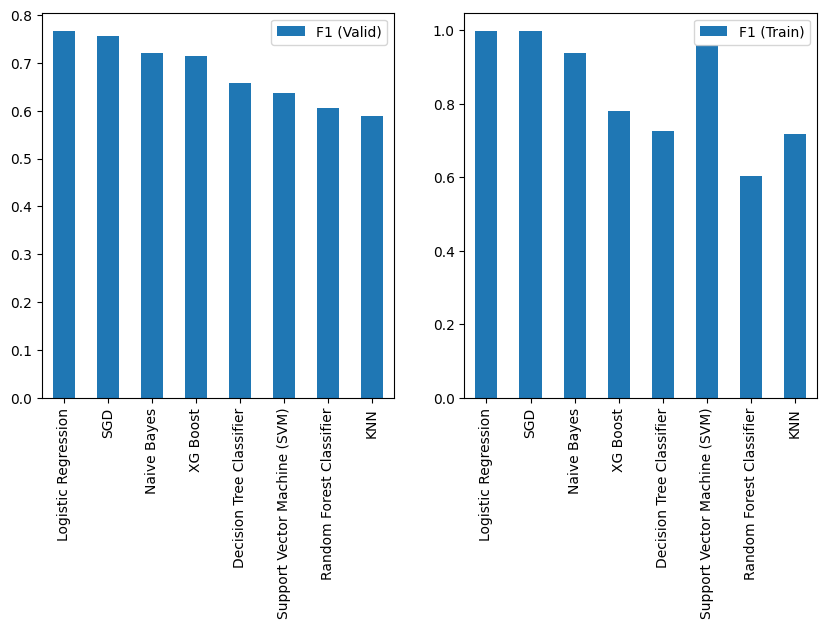

In [122]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results_df.sort_values('F1 (Valid)', ascending=False, inplace=True)
results_df.plot(y=['F1 (Valid)'], kind='bar', ax=ax[0], xlim=[0,1.1])
results_df.plot(y='F1 (Train)', kind='bar', ax=ax[1])

In [123]:
# Choose best model and motivate why it is the best choice

# Best model was the Logistic Regression model which gave the highest F1 score and ran quicker than some of the other models


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [124]:
# discuss chosen methods logic

#Logistic Regression was the chosen model

#Logistic regression is a machine learning model used for classification tasks. 
#It predicts the probability that observed data belongs to a given class. 
#It is referred to as regression because it takes the output of the linear regression 
#function as input and uses a sigmoid function to then estimate the probability that the data belongs to a given class. 
#Linear regression differs to logistic regression in the output values.
#linear regression output is the continuous value which is the predicted values
#logistic regression predicts the probability that the data belongs to a given class or not.
